In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import torch
from matplotlib.colors import LogNorm


In [2]:
file_path_1 = "/fast_scratch/QVAE/data/atlas_dataset2and3/dataset_2_1.hdf5"
data_dict_1 = {}
# Open the HDF5 file
with h5py.File(file_path_1, 'r') as file:
    # List all groups
    print("Keys: %s" % file.keys())
    for key in file.keys():
        data_dict_1[key] = torch.tensor(file[key][:])

Keys: <KeysViewHDF5 ['incident_energies', 'showers']>


In [3]:
file_path_s = "/fast_scratch/QVAE/syn_data/wise-tree-1429.hdf5"
data_dict_s = {}
# Open the HDF5 file
with h5py.File(file_path_s, 'r') as file:
    # List all groups
    print("Keys: %s" % file.keys())
    for key in file.keys():
        data_dict_s[key] = torch.tensor(file[key][:])

Keys: <KeysViewHDF5 ['incidence energy', 'showers']>


In [4]:
incident_1 = data_dict_1['incident_energies']
showers_1 = data_dict_1['showers']
incident_s = data_dict_s['incidence energy']
showers_s = data_dict_s['showers']

In [5]:
max_incident_1 = incident_1.max()
max_incident_s = incident_s.max()

print("Maximum value of incident_1:", max_incident_1.item())
print("Maximum value of incident_s:", max_incident_s.item())

Maximum value of incident_1: 999795.7883919457
Maximum value of incident_s: 999929.125


In [6]:
def filter_showers_by_energy(incident_energies, showers, lower_bound, upper_bound):
    filtered_mask = (incident_energies >= lower_bound) & (incident_energies <= upper_bound)
    filtered_indexes = torch.nonzero(filtered_mask, as_tuple=False)
    return showers[filtered_indexes[:, 0]]

# Filter showers for the specified ranges
filtered_showers_11 = filter_showers_by_energy(incident_1, showers_1, 10000, 11000)
filtered_showers_12 = filter_showers_by_energy(incident_1, showers_1, 50000, 55000)
filtered_showers_13 = filter_showers_by_energy(incident_1, showers_1, 100000, 110000)
filtered_showers_s1 = filter_showers_by_energy(incident_s, showers_s, 10000, 11000)
filtered_showers_s2 = filter_showers_by_energy(incident_s, showers_s, 50000, 55000)
filtered_showers_s3 = filter_showers_by_energy(incident_s, showers_s, 100000, 110000)

print("Size of filtered DS2 showers (10000 to 11000):", filtered_showers_11.size())
print("Size of filtered DS2 showers (50000 to 55000):", filtered_showers_12.size())
print("Size of filtered DS2 showers (10000 to 11000):", filtered_showers_13.size())
print("Size of filtered DS2 showers (50000 to 55000):", filtered_showers_s1.size())
print("Size of filtered DS2 showers (10000 to 11000):", filtered_showers_s2.size())
print("Size of filtered DS2 showers (50000 to 55000):", filtered_showers_s3.size())

Size of filtered DS2 showers (10000 to 11000): torch.Size([1377, 6480])
Size of filtered DS2 showers (50000 to 55000): torch.Size([1438, 6480])
Size of filtered DS2 showers (10000 to 11000): torch.Size([1413, 6480])
Size of filtered DS2 showers (50000 to 55000): torch.Size([1412, 6480])
Size of filtered DS2 showers (10000 to 11000): torch.Size([1354, 6480])
Size of filtered DS2 showers (50000 to 55000): torch.Size([1436, 6480])


In [7]:

print(showers_s.shape)

torch.Size([100000, 6480])


In [8]:
import torch

# Define a function to reshape and condense a tensor
def reshape_and_condense(tensor, new_shape, sum_dim):
    reshaped_tensor = tensor.view(new_shape)
    condensed_tensor = torch.sum(reshaped_tensor, dim=sum_dim)
    return condensed_tensor

# Apply the function to different tensors
condensed_tensor_1 = reshape_and_condense(showers_1, (100000, 45, 144), 2)
condensed_tensor_s = reshape_and_condense(showers_s, (100000, 45, 144), 2)
condensed_tensor_f11 = reshape_and_condense(filtered_showers_11, (1377, 45, 144), 2)
condensed_tensor_fs1 = reshape_and_condense(filtered_showers_s1, (1412, 45, 144), 2)
condensed_tensor_f12 = reshape_and_condense(filtered_showers_12, (1438, 45, 144), 2)
condensed_tensor_fs2 = reshape_and_condense(filtered_showers_s2, (1354, 45, 144), 2)
condensed_tensor_f13 = reshape_and_condense(filtered_showers_13, (1413, 45, 144), 2)
condensed_tensor_fs3 = reshape_and_condense(filtered_showers_s3, (1436, 45, 144), 2)

# Print the shapes of the condensed tensors
print("Shape of condensed_tensor_1:", condensed_tensor_1.size())
print("Shape of condensed_tensor_s:", condensed_tensor_s.size())
print("Shape of condensed_tensor_f11:", condensed_tensor_f11.size())
print("Shape of condensed_tensor_fs1:", condensed_tensor_fs1.size())
print("Shape of condensed_tensor_f12:", condensed_tensor_f12.size())
print("Shape of condensed_tensor_fs2:", condensed_tensor_fs2.size())
print("Shape of condensed_tensor_f13:", condensed_tensor_f13.size())
print("Shape of condensed_tensor_fs3:", condensed_tensor_fs3.size())

Shape of condensed_tensor_1: torch.Size([100000, 45])
Shape of condensed_tensor_s: torch.Size([100000, 45])
Shape of condensed_tensor_f11: torch.Size([1377, 45])
Shape of condensed_tensor_fs1: torch.Size([1412, 45])
Shape of condensed_tensor_f12: torch.Size([1438, 45])
Shape of condensed_tensor_fs2: torch.Size([1354, 45])
Shape of condensed_tensor_f13: torch.Size([1413, 45])
Shape of condensed_tensor_fs3: torch.Size([1436, 45])


In [9]:
def mean_subtract(tensor):
    return tensor - tensor.mean(dim=0)

showers_m_1 = mean_subtract(condensed_tensor_1)
showers_m_s = mean_subtract(condensed_tensor_s)
showers_m_11 = mean_subtract(condensed_tensor_f11)
showers_m_s1 = mean_subtract(condensed_tensor_fs1)
showers_m_12 = mean_subtract(condensed_tensor_f12)
showers_m_13 = mean_subtract(condensed_tensor_f13)
showers_m_s2 = mean_subtract(condensed_tensor_fs2)
showers_m_s3 = mean_subtract(condensed_tensor_fs3)

In [10]:
def matmul_and_normalize(tensor):
    return torch.matmul(tensor.t(), tensor) / tensor.size(0)
M61 = matmul_and_normalize(showers_m_1)
M6s = matmul_and_normalize(showers_m_s)
M611 = matmul_and_normalize(showers_m_11)
M6s1 = matmul_and_normalize(showers_m_s1)
M612 = matmul_and_normalize(showers_m_12)
M613 = matmul_and_normalize(showers_m_13)
M6s2 = matmul_and_normalize(showers_m_s2)
M6s3 = matmul_and_normalize(showers_m_s3)

# Print the shapes of the results
print("Shape of M61:", M61.shape)
print("Shape of M6s:", M6s.shape)
print("Shape of M611:", M611.shape)
print("Shape of M6s1:", M6s1.shape)
print("Shape of M612:", M612.shape)
print("Shape of M613:", M613.shape)
print("Shape of M6s2:", M6s2.shape)
print("Shape of M6s3:", M6s3.shape)

Shape of M61: torch.Size([45, 45])
Shape of M6s: torch.Size([45, 45])
Shape of M611: torch.Size([45, 45])
Shape of M6s1: torch.Size([45, 45])
Shape of M612: torch.Size([45, 45])
Shape of M613: torch.Size([45, 45])
Shape of M6s2: torch.Size([45, 45])
Shape of M6s3: torch.Size([45, 45])


In [11]:
def calculate_correlation_matrix(tensor, M):
    std_dev = torch.sqrt(torch.var(tensor, dim=0, unbiased=False))
    correlation_matrix = M / (std_dev.unsqueeze(0) * std_dev.unsqueeze(1))
    correlation_matrix[torch.isnan(correlation_matrix)] = 0
    return correlation_matrix

correlation_matrix_1 = calculate_correlation_matrix(showers_m_1, M61)
correlation_matrix_s = calculate_correlation_matrix(showers_m_s, M6s)
correlation_matrix_11 = calculate_correlation_matrix(showers_m_11, M611)
correlation_matrix_s1 = calculate_correlation_matrix(showers_m_s1, M6s1)
correlation_matrix_12 = calculate_correlation_matrix(showers_m_12, M612)
correlation_matrix_13 = calculate_correlation_matrix(showers_m_13, M613)
correlation_matrix_s2 = calculate_correlation_matrix(showers_m_s2, M6s2)
correlation_matrix_s3 = calculate_correlation_matrix(showers_m_s3, M6s3)


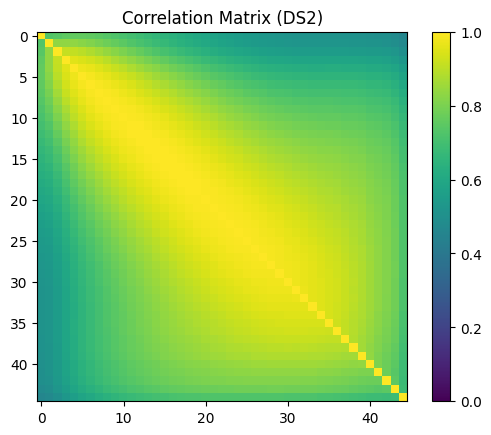

In [12]:
CM1 = correlation_matrix_1.numpy()
plt.imshow(CM1, cmap='viridis', interpolation='nearest', vmin=0, vmax=1)
plt.colorbar() 
plt.title('Correlation Matrix (DS2)')
plt.show()

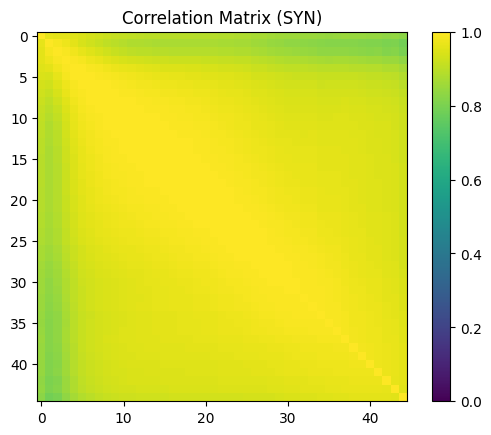

In [13]:
CMs = correlation_matrix_s.numpy()
plt.imshow(CMs, cmap='viridis', interpolation='nearest', vmin=0, vmax=1)
plt.colorbar()
plt.title('Correlation Matrix (SYN)')
plt.show()

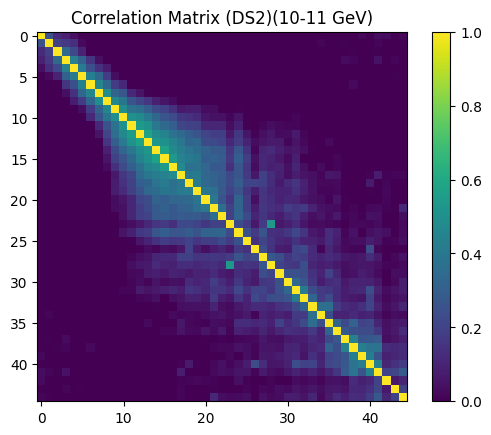

In [14]:
CM11 = correlation_matrix_11.numpy()
plt.imshow(CM11, cmap='viridis', interpolation='nearest', vmin=0, vmax=1)
plt.colorbar() 
plt.title('Correlation Matrix (DS2)(10-11 GeV)')
plt.show()

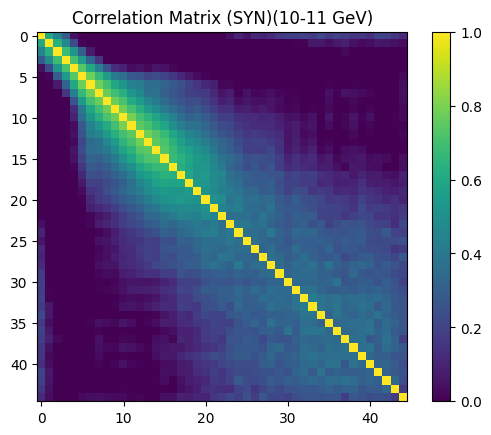

In [15]:
correlation_matrix_s1 = calculate_correlation_matrix(showers_m_s1, M6s1)
CMs1 = correlation_matrix_s1.numpy()
plt.imshow(CMs1, cmap='viridis', interpolation='nearest', vmin=0, vmax=1)
plt.colorbar() 
plt.title('Correlation Matrix (SYN)(10-11 GeV)')
plt.show()

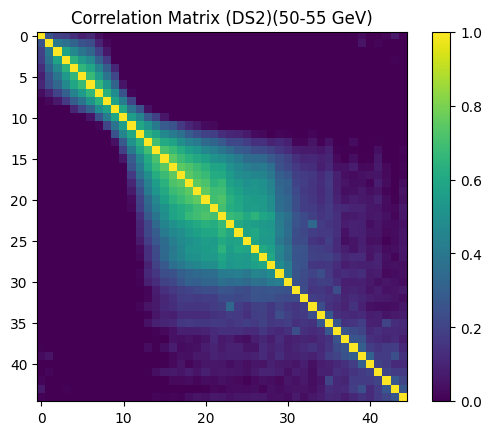

In [16]:
correlation_matrix_12 = calculate_correlation_matrix(showers_m_12, M612)
CM12 = correlation_matrix_12.numpy()
plt.imshow(CM12, cmap='viridis', interpolation='nearest', vmin=0, vmax=1)
plt.colorbar() 
plt.title('Correlation Matrix (DS2)(50-55 GeV)')
plt.show()

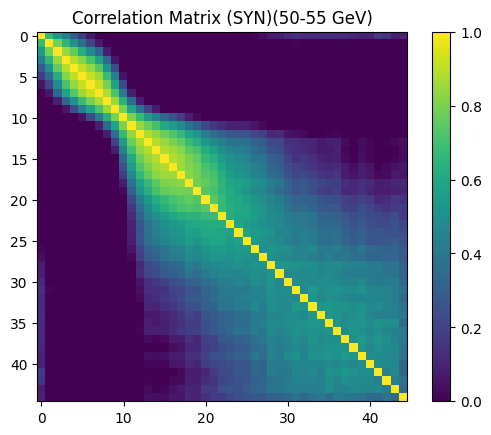

In [17]:
correlation_matrix_s2 = calculate_correlation_matrix(showers_m_s2, M6s2)
CMs2 = correlation_matrix_s2.numpy()
plt.imshow(CMs2, cmap='viridis', interpolation='nearest', vmin=0, vmax=1)
plt.colorbar() 
plt.title('Correlation Matrix (SYN)(50-55 GeV)')
plt.show()

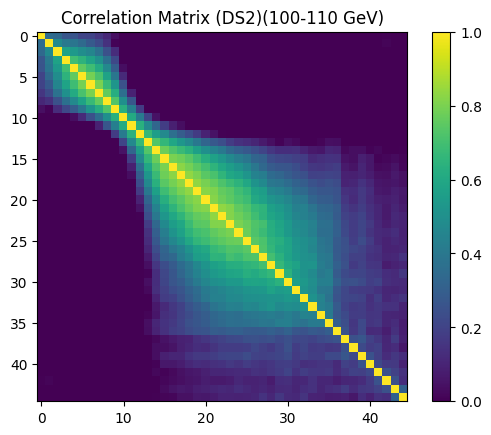

In [18]:
correlation_matrix_13 = calculate_correlation_matrix(showers_m_13, M613)
CM13 = correlation_matrix_13.numpy()
plt.imshow(CM13, cmap='viridis', interpolation='nearest', vmin=0, vmax=1)
plt.colorbar() 
plt.title('Correlation Matrix (DS2)(100-110 GeV)')
plt.show()

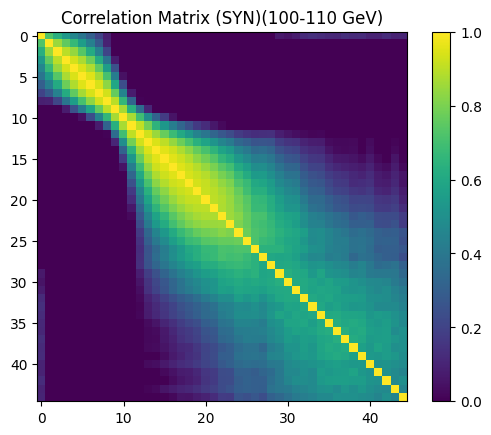

In [19]:
correlation_matrix_s3 = calculate_correlation_matrix(showers_m_s3, M6s3)
CMs3 = correlation_matrix_s3.numpy()
plt.imshow(CMs3, cmap='viridis', interpolation='nearest', vmin=0, vmax=1)
plt.colorbar() 
plt.title('Correlation Matrix (SYN)(100-110 GeV)')
plt.show()

NameError: name 'rows_to_plot3' is not defined

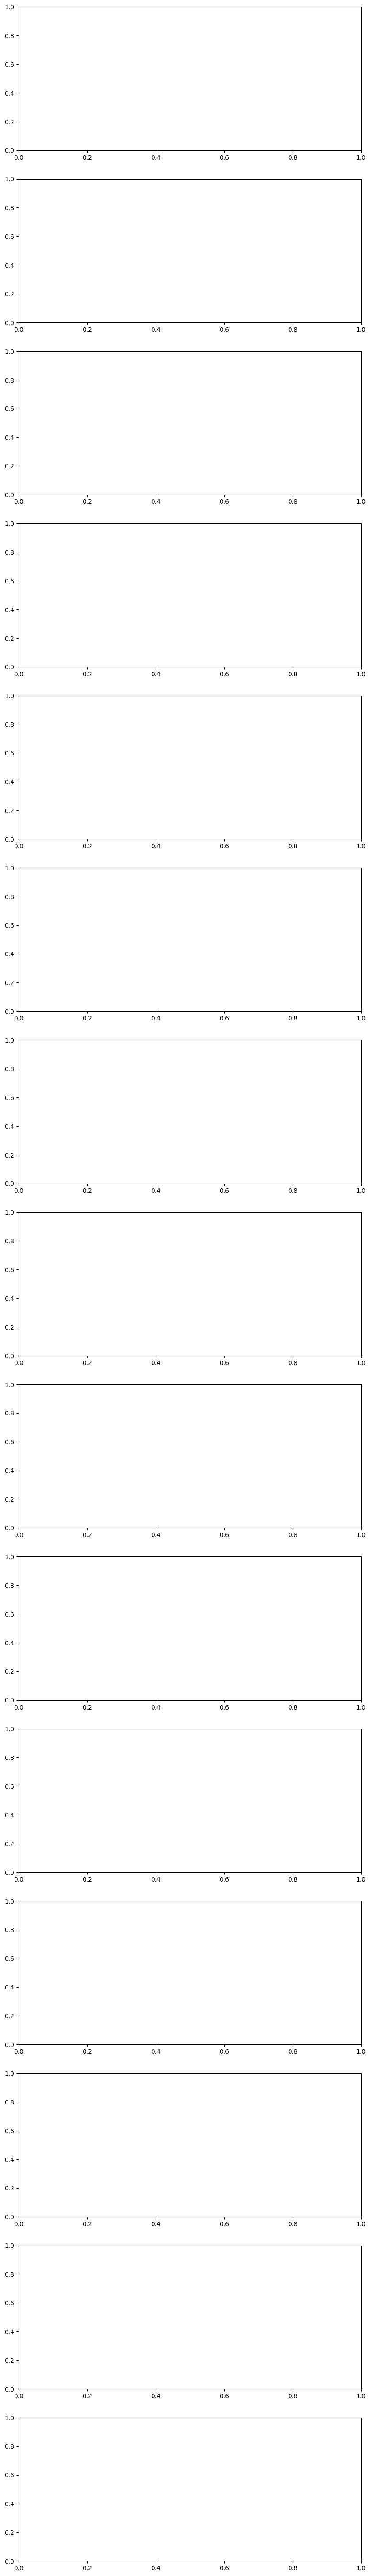

In [20]:
rows_to_plot1 = CM1[2::3, :]
rows_to_plot2 = CMs[2::3, :]

# Create x-axis values (bars representing the columns)
x_values = np.arange(1, 46)

# Calculate the maximum value for the y-axis limit
max_value = max(np.max(rows_to_plot1), np.max(rows_to_plot2))  # Adjusted for rows_to_plot3

# Number of subplots
num_subplots = len(rows_to_plot1)

# Set up subplots
fig, axes = plt.subplots(num_subplots, 1, figsize=(10, 5 * num_subplots))

# Plot histograms for every third row in each subplot
for i, (row_to_plot1, row_to_plot2, row_to_plot3) in enumerate(zip(rows_to_plot1, rows_to_plot2, rows_to_plot3)):
    axes[i].bar(x_values - 0.2, row_to_plot1, alpha=0.5, label=f'Dataset2 - Row {3*i + 3}', color='blue', width=0.2)
    axes[i].bar(x_values, row_to_plot2, alpha=0.5, label=f'Old SYN - Row {3*i + 3}', color='orange', width=0.2)

    # Adding labels and title to each subplot
    axes[i].set_xlabel('Column Index')
    axes[i].set_ylabel(f'Value in Row {3*i + 3}')
    axes[i].set_title(f'Subplot {i + 1}')

    # Set y-axis limit for each subplot
    axes[i].set_ylim(0, max_value)

    # Displaying legend
    axes[i].legend()

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()

In [ ]:
rows_to_plot1 = CM1L[2::3, :]
rows_to_plot2 = CMsL[2::3, :]
rows_to_plot3 = CMsnL[2::3, :]  # Include rows_to_plot3

# Create x-axis values (bars representing the columns)
x_values = np.arange(1, 46)

# Calculate the maximum value for the y-axis limit
max_value = max(np.max(rows_to_plot1), np.max(rows_to_plot2), np.max(rows_to_plot3))  # Adjusted for rows_to_plot3

# Number of subplots
num_subplots = len(rows_to_plot1)

# Set up subplots
fig, axes = plt.subplots(num_subplots, 1, figsize=(10, 5 * num_subplots))

# Plot histograms for every third row in each subplot
for i, (row_to_plot1, row_to_plot2, row_to_plot3) in enumerate(zip(rows_to_plot1, rows_to_plot2, rows_to_plot3)):
    axes[i].bar(x_values - 0.2, row_to_plot1, alpha=0.5, label=f'Dataset2 - Row {3*i + 3}', color='blue', width=0.2)
    axes[i].bar(x_values, row_to_plot2, alpha=0.5, label=f'Old SYN - Row {3*i + 3}', color='orange', width=0.2)
    axes[i].bar(x_values + 0.2, row_to_plot3, alpha=0.5, label=f'New SYN - Row {3*i + 3}', color='green', width=0.2)  # Added row_to_plot3

    # Adding labels and title to each subplot
    axes[i].set_xlabel('Column Index')
    axes[i].set_ylabel(f'Value in Row {3*i + 3}')
    axes[i].set_title(f'Subplot {i + 1}')

    # Set y-axis limit for each subplot
    axes[i].set_ylim(0, max_value)

    # Displaying legend
    axes[i].legend()

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()